In [1]:
import math
import random
import copy
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    if z < -100:
        return 0
    if z > 100:
        return 1
    return 1.0 / math.exp(-z)

In [3]:
all_data = []
with open("./data/ecoli.data", "r") as file:
    [all_data.append(line.split()) for line in file]

for row in all_data:
    print(row)

['AAT_ECOLI', '0.49', '0.29', '0.48', '0.50', '0.56', '0.24', '0.35', 'cp']
['ACEA_ECOLI', '0.07', '0.40', '0.48', '0.50', '0.54', '0.35', '0.44', 'cp']
['ACEK_ECOLI', '0.56', '0.40', '0.48', '0.50', '0.49', '0.37', '0.46', 'cp']
['ACKA_ECOLI', '0.59', '0.49', '0.48', '0.50', '0.52', '0.45', '0.36', 'cp']
['ADI_ECOLI', '0.23', '0.32', '0.48', '0.50', '0.55', '0.25', '0.35', 'cp']
['ALKH_ECOLI', '0.67', '0.39', '0.48', '0.50', '0.36', '0.38', '0.46', 'cp']
['AMPD_ECOLI', '0.29', '0.28', '0.48', '0.50', '0.44', '0.23', '0.34', 'cp']
['AMY2_ECOLI', '0.21', '0.34', '0.48', '0.50', '0.51', '0.28', '0.39', 'cp']
['APT_ECOLI', '0.20', '0.44', '0.48', '0.50', '0.46', '0.51', '0.57', 'cp']
['ARAC_ECOLI', '0.42', '0.40', '0.48', '0.50', '0.56', '0.18', '0.30', 'cp']
['ASG1_ECOLI', '0.42', '0.24', '0.48', '0.50', '0.57', '0.27', '0.37', 'cp']
['BTUR_ECOLI', '0.25', '0.48', '0.48', '0.50', '0.44', '0.17', '0.29', 'cp']
['CAFA_ECOLI', '0.39', '0.32', '0.48', '0.50', '0.46', '0.24', '0.35', 'cp']
['

# Preprocessing
* Set "cp" to 1 and "im" to 0, discard rest
* Cast all strings to floats (`row[1]` to `row[7]`)

In [4]:
all_data_copy = copy.deepcopy(all_data)
data = []

for row in all_data_copy:        
    if row[-1] == "cp":
        row[-1] = 1
    elif row[-1] == "im":
        row[-1] = 0
    else:
        continue
        
    for i in range(1, len(row) - 1):
        row[i] = float(row[i])
    data.append(row[1:])

for row in data:
    print(row)

[0.49, 0.29, 0.48, 0.5, 0.56, 0.24, 0.35, 1]
[0.07, 0.4, 0.48, 0.5, 0.54, 0.35, 0.44, 1]
[0.56, 0.4, 0.48, 0.5, 0.49, 0.37, 0.46, 1]
[0.59, 0.49, 0.48, 0.5, 0.52, 0.45, 0.36, 1]
[0.23, 0.32, 0.48, 0.5, 0.55, 0.25, 0.35, 1]
[0.67, 0.39, 0.48, 0.5, 0.36, 0.38, 0.46, 1]
[0.29, 0.28, 0.48, 0.5, 0.44, 0.23, 0.34, 1]
[0.21, 0.34, 0.48, 0.5, 0.51, 0.28, 0.39, 1]
[0.2, 0.44, 0.48, 0.5, 0.46, 0.51, 0.57, 1]
[0.42, 0.4, 0.48, 0.5, 0.56, 0.18, 0.3, 1]
[0.42, 0.24, 0.48, 0.5, 0.57, 0.27, 0.37, 1]
[0.25, 0.48, 0.48, 0.5, 0.44, 0.17, 0.29, 1]
[0.39, 0.32, 0.48, 0.5, 0.46, 0.24, 0.35, 1]
[0.51, 0.5, 0.48, 0.5, 0.46, 0.32, 0.35, 1]
[0.22, 0.43, 0.48, 0.5, 0.48, 0.16, 0.28, 1]
[0.25, 0.4, 0.48, 0.5, 0.46, 0.44, 0.52, 1]
[0.34, 0.45, 0.48, 0.5, 0.38, 0.24, 0.35, 1]
[0.44, 0.27, 0.48, 0.5, 0.55, 0.52, 0.58, 1]
[0.23, 0.4, 0.48, 0.5, 0.39, 0.28, 0.38, 1]
[0.41, 0.57, 0.48, 0.5, 0.39, 0.21, 0.32, 1]
[0.4, 0.45, 0.48, 0.5, 0.38, 0.22, 0.0, 1]
[0.31, 0.23, 0.48, 0.5, 0.73, 0.05, 0.14, 1]
[0.51, 0.54, 0.48, 0

### Train and test data
* Shuffle data
* Add 70% to training and 30% to testing
* Add random weights

In [5]:
random.shuffle(data)
training_percent = round((len(data) / 100) * 70)
training_data = data[:training_percent]
testing_data = data[training_percent:]

weights = [1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1]

### Define layers
* Three layers
* x1 with x2, x3 with x4, and x5 with x6 and x7

In [6]:
def first_layer(x, w):
    activation_1 = w[0]
    activation_1 += w[1] * x[0]
    activation_1 += w[2] * x[1]

    activation_2 = w[3]
    activation_2 += w[4] * x[2]
    activation_2 += w[5] * x[3]

    activation_3 = w[6]
    activation_3 += w[7] * x[4]
    activation_3 += w[8] * x[5]
    activation_3 += w[9] * x[6]

    return sigmoid(activation_1), sigmoid(activation_2), sigmoid(activation_3)


def second_layer(x, w):
    activation_4 = w[10]
    activation_4 += w[11] * x[0]
    activation_4 += w[12] * x[1]

    activation_5 = w[13]
    activation_5 += w[14] * x[1]
    activation_5 += w[15] * x[2]

    return sigmoid(activation_4), sigmoid(activation_5)


def third_layer(x, w):
    activation_6 = w[16]
    activation_6 += w[17] * x[0]
    activation_6 += w[18] * x[1]

    # treshold = 1 # TODO: Find out what treshold should be
    # return linear_activation(activation_6, treshold)
    return sigmoid(activation_6)

### Prediction
* Print y hat and y

In [7]:
def predict(x, w):
    input_layer = x
    layer_1 = first_layer(input_layer, w)
    layer_2 = second_layer(layer_1, w)
    layer_3 = third_layer(layer_2, w)
    return layer_3, layer_2, layer_1

In [8]:
for row in training_data:
    print(predict(row, weights)[0], row[-1])

2.533935219936845 1
2.7178034531076127 0
2.6691372932502913 1
2.469295129807137 1
2.437028993152058 1
2.495627068342077 0
2.5094199509292827 1
2.6576709569326153 1
2.4564481570346683 1
2.305922775689312 1
2.73923599018984 1
2.0688351884986678 1
2.450570595617497 0
2.05856123273363 1
2.506879089097244 1
2.5642453982489095 1
2.7323943422592203 0
2.2004140788076785 0
2.575346737395621 1
2.1314941644512144 1
2.4300032999578067 1
2.0515986812317326 1
2.4012780659389463 1
2.06146174338269 1
1.9034429861512896 0
2.1662000654386926 1
2.588470806751715 1
2.5865458124359337 0
2.1185906560010372 0
2.3788155348325666 1
2.6759581015638076 1
2.3383997488146124 1
2.6366482705422776 0
2.034422963104225 1
2.6174713917053016 1
2.8089817504284347 1
2.7063556350996625 0
2.163107012907978 1
2.260409317091623 1
2.2724774788065263 1
2.370196562694886 1
2.5711002176207223 1
2.759547134511225 1
2.0804096340492038 1
2.7096384643550535 1
2.584292716340275 1
2.367026931956 1
2.0741494494382366 0
1.895697215326065

# Train weights

In [9]:
plot_error = []

def train_weights(train, learning_rate, epochs):
    for epoch in range(epochs):
        sum_error = 0.0
        last_error = 0.0

        for row in train:
            prediction, layer_2, layer_1 = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error

            # Layer 1
            weights[0] = weights[0] + learning_rate * error
            weights[3] = weights[3] + learning_rate * error
            weights[6] = weights[6] + learning_rate * error

            weights[1] = weights[1] + learning_rate * error * row[0]
            weights[2] = weights[2] + learning_rate * error * row[1]
            weights[4] = weights[4] + learning_rate * error * row[2]
            weights[5] = weights[5] + learning_rate * error * row[3]
            weights[7] = weights[7] + learning_rate * error * row[4]
            weights[8] = weights[8] + learning_rate * error * row[5]
            weights[9] = weights[9] + learning_rate * error * row[6]

            # Layer 2
            weights[10] = weights[10] + learning_rate * error
            weights[13] = weights[13] + learning_rate * error

            weights[11] = weights[11] + learning_rate * error * layer_1[0]
            weights[12] = weights[12] + learning_rate * error * layer_1[1]
            weights[14] = weights[14] + learning_rate * error * layer_1[1]
            weights[15] = weights[15] + learning_rate * error * layer_1[2]

            # Layer 3
            weights[16] = weights[16] + learning_rate * error

            weights[17] = weights[17] + learning_rate * error * layer_2[0]
            weights[18] = weights[18] + learning_rate * error * layer_2[1]

        if epoch % 100 == 0 or last_error != sum_error:
            print(f"Epoch {epoch} => Error {sum_error}")

        plot_error.append(sum_error)
        last_error = sum_error

    return weights

In [10]:
learning_rate = 0.0001  # 0.00001
epochs = 1000   # 10000
trained_weights = train_weights(training_data, learning_rate, epochs)

Epoch 0 => Error -263.5803622469701
Epoch 1 => Error -262.45094437913326
Epoch 2 => Error -259.35534272710186
Epoch 3 => Error -254.92399022820754
Epoch 4 => Error -249.62021190583536
Epoch 5 => Error -243.77562085894868
Epoch 6 => Error -237.62388080464044
Epoch 7 => Error -231.32798900011375
Epoch 8 => Error -225.00073420267654
Epoch 9 => Error -218.71947625659098
Epoch 10 => Error -212.5366291302869
Epoch 11 => Error -206.4870374721709
Epoch 12 => Error -200.59315689560285
Epoch 13 => Error -194.8686971517187
Epoch 14 => Error -189.3211928727853
Epoch 15 => Error -183.95382534882202
Epoch 16 => Error -178.76671945069992
Epoch 17 => Error -173.75787098597
Epoch 18 => Error -168.92381239448886
Epoch 19 => Error -164.26009211090238
Epoch 20 => Error -159.76162046974628
Epoch 21 => Error -155.4229194940308
Epoch 22 => Error -151.23830310225742
Epoch 23 => Error -147.2020067076155
Epoch 24 => Error -143.30827985902948
Epoch 25 => Error -139.5514518009101
Epoch 26 => Error -135.9259771378

Epoch 256 => Error -2.8827201040692745
Epoch 257 => Error -2.8385749382019716
Epoch 258 => Error -2.7950194578220517
Epoch 259 => Error -2.7520452770687376
Epoch 260 => Error -2.709644141364918
Epoch 261 => Error -2.6678079250553686
Epoch 262 => Error -2.6265286290950502
Epoch 263 => Error -2.5857983787860896
Epoch 264 => Error -2.5456094215624656
Epoch 265 => Error -2.505954124820918
Epoch 266 => Error -2.4668249737975456
Epoch 267 => Error -2.4282145694882162
Epoch 268 => Error -2.3901156266122627
Epoch 269 => Error -2.3525209716180266
Epoch 270 => Error -2.315423540730018
Epoch 271 => Error -2.278816378035281
Epoch 272 => Error -2.2426926336096846
Epoch 273 => Error -2.207045561681767
Epoch 274 => Error -2.171868518834161
Epoch 275 => Error -2.137154962241163
Epoch 276 => Error -2.1028984479420907
Epoch 277 => Error -2.069092629149103
Epoch 278 => Error -2.035731254588813
Epoch 279 => Error -2.0028081668770983
Epoch 280 => Error -1.9703173009261636
Epoch 281 => Error -1.938252682383

Epoch 468 => Error 0.3181826188578025
Epoch 469 => Error 0.3212312594303133
Epoch 470 => Error 0.3242443737311247
Epoch 471 => Error 0.3272224128155229
Epoch 472 => Error 0.33016582194253385
Epoch 473 => Error 0.3330750406503592
Epoch 474 => Error 0.33595050283079886
Epoch 475 => Error 0.33879263680306626
Epoch 476 => Error 0.3416018653858941
Epoch 477 => Error 0.3443786059693148
Epoch 478 => Error 0.34712327058528747
Epoch 479 => Error 0.34983626597713824
Epoch 480 => Error 0.3525179936684384
Epoch 481 => Error 0.3551688500307101
Epoch 482 => Error 0.3577892263504182
Epoch 483 => Error 0.3603795088948869
Epoch 484 => Error 0.36294007897734915
Epoch 485 => Error 0.3654713130214148
Epoch 486 => Error 0.36797358262437885
Epoch 487 => Error 0.37044725461967953
Epoch 488 => Error 0.37289269113883017
Epoch 489 => Error 0.375310249672141
Epoch 490 => Error 0.37770028312902737
Epoch 491 => Error 0.3800631398971184
Epoch 492 => Error 0.38239916390089335
Epoch 493 => Error 0.3847086946595113
Ep

Epoch 703 => Error 0.5844350581181272
Epoch 704 => Error 0.584798878972988
Epoch 705 => Error 0.5851607524465166
Epoch 706 => Error 0.5855207007266663
Epoch 707 => Error 0.5858787457206126
Epoch 708 => Error 0.5862349090581958
Epoch 709 => Error 0.5865892120956908
Epoch 710 => Error 0.5869416759190361
Epoch 711 => Error 0.5872923213475999
Epoch 712 => Error 0.587641168937238
Epoch 713 => Error 0.5879882389838013
Epoch 714 => Error 0.5883335515265296
Epoch 715 => Error 0.5886771263511417
Epoch 716 => Error 0.5890189829933282
Epoch 717 => Error 0.5893591407416039
Epoch 718 => Error 0.5896976186408077
Epoch 719 => Error 0.5900344354949256
Epoch 720 => Error 0.590369609870385
Epoch 721 => Error 0.590703160098959
Epoch 722 => Error 0.591035104280768
Epoch 723 => Error 0.5913654602871722
Epoch 724 => Error 0.59169424576387
Epoch 725 => Error 0.5920214781336759
Epoch 726 => Error 0.592347174599294
Epoch 727 => Error 0.5926713521462069
Epoch 728 => Error 0.5929940275454456
Epoch 729 => Error 0

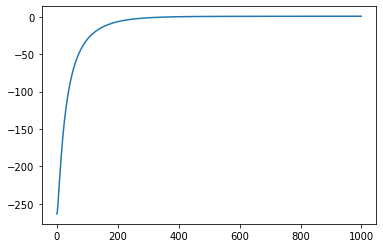

In [11]:
plt.plot(plot_error)
plt.show()

### Print final weights

In [12]:
for index, weight in enumerate(trained_weights):
    print(f"w{index} = {weight}")

w0 = -0.1822960168346286
w1 = -1.6459399643885737
w2 = 0.24124795872622856
w3 = -2.1822960168345746
w4 = 0.4324979119193798
w5 = -1.5911480084172833
w6 = -0.1822960168346286
w7 = -1.7887746997591145
w8 = -0.9562327465189566
w9 = -2.6942252500137935
w10 = -0.1822960168346286
w11 = -2.6444171394621647
w12 = 0.7987036668410551
w13 = -2.1822960168345746
w14 = 0.7987036668410551
w15 = -1.530447132756357
w16 = -0.1822960168346286
w17 = -1.2258492817402002
w18 = 0.8435999821031345


# Test data

In [ ]:
loss = []

for index, row in enumerate(testing_data):
    prediction, layer_2, layer_1 = predict(row, trained_weights)
    step = 0
    if prediction * 100 >= 1:
        step = 1
    loss.append(row[-1] - step)
    print(f"Epoch {index + 1} => y = {row[-1]} | Prediction: {step} | Error: {loss[index]}")


Epoch 1 => y = 1 | Prediction: 1 | Error: 0
Epoch 2 => y = 1 | Prediction: 1 | Error: 0
Epoch 3 => y = 1 | Prediction: 1 | Error: 0
Epoch 4 => y = 0 | Prediction: 1 | Error: -1
Epoch 5 => y = 1 | Prediction: 1 | Error: 0
Epoch 6 => y = 1 | Prediction: 1 | Error: 0
Epoch 7 => y = 1 | Prediction: 1 | Error: 0
Epoch 8 => y = 1 | Prediction: 1 | Error: 0
Epoch 9 => y = 0 | Prediction: 1 | Error: -1
Epoch 10 => y = 1 | Prediction: 1 | Error: 0
Epoch 11 => y = 0 | Prediction: 1 | Error: -1
Epoch 12 => y = 1 | Prediction: 1 | Error: 0
Epoch 13 => y = 1 | Prediction: 1 | Error: 0
Epoch 14 => y = 1 | Prediction: 1 | Error: 0
Epoch 15 => y = 1 | Prediction: 1 | Error: 0
Epoch 16 => y = 0 | Prediction: 1 | Error: -1
Epoch 17 => y = 0 | Prediction: 1 | Error: -1
Epoch 18 => y = 0 | Prediction: 1 | Error: -1
Epoch 19 => y = 0 | Prediction: 1 | Error: -1
Epoch 20 => y = 0 | Prediction: 1 | Error: -1
Epoch 21 => y = 1 | Prediction: 1 | Error: 0
Epoch 22 => y = 0 | Prediction: 1 | Error: -1
Epoch 23 =

In [14]:
counter = { "correct": 0, "wrong": 0 }
for l in loss:
    if l == 0:
        counter["correct"] += 1
    else:
        counter["wrong"] += 1

accuracy = (counter["correct"] / (counter["correct"] + counter["wrong"])) * 100
print(f"Accuracy: {accuracy:.3g}%")

Accuracy: 57.6%
